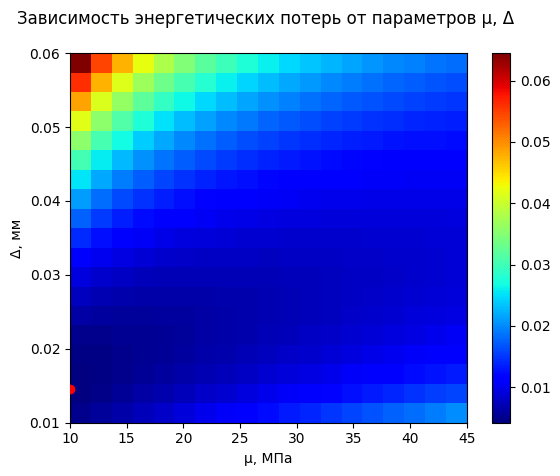

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin

D=110
L=110
l=86
l_0 = 12
teta = 0.785
P = 350
n = 3000

A_ef = D*(l+l_0) * sin(pi/4)


P_n = P/A_ef * ((2*0.35)/0.3)


def P_ny(ny, delta):
    return 0.055 * 10**-16 * ny * D**3 * (n/delta)*(pi*L - 2*l*teta)


def P_q(ny, delta):
    Q = 1.02 * 10**7 * ((P_n * delta**3 * pi * D )/(ny*l_0))
    return 10**-3 * Q * P_n

# generate 2 2d grids for the x & y bounds
x, y = np.meshgrid(np.linspace(10, 45, 20), np.linspace(0.01, 0.06, 20))

z = (P_ny(x, y) + P_q(x, y))
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = np.abs(z).min(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='jet', vmin=z_min, vmax=z_max)
ax.set_title('Зависимость энергетических потерь от параметров μ, Δ \n')
ax.set_xlabel("μ, МПа")
ax.set_ylabel("Δ, мм")
ax.scatter(10, 0.0146182019168059 , color="red", zorder=10)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

#plt.show()

А_эф = 7622.6111011909825
P_n = 0.10713739108887084
P_ny = 0.0031671971553420184
P_q = 0.0010493060675993023


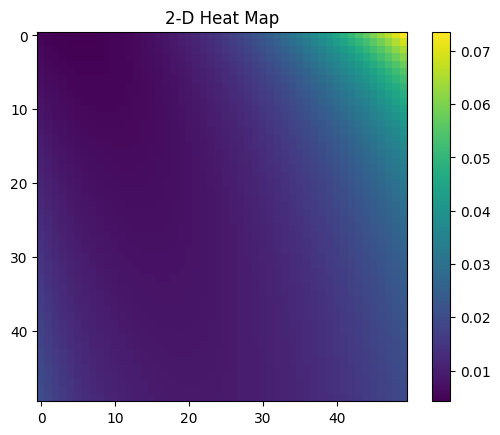

In [36]:
import numpy as np
import matplotlib.pyplot as plt

 

D=110
L=110
l=86
l_0 = 12
teta = 0.785
P = 350
n = 3000

A_ef = D*(l+l_0) * sin(pi/4)
P_n = P/A_ef * ((2*0.35)/0.3)

print("А_эф =", A_ef)
print("P_n =", P_n)

def P_ny(ny, delta):
    return (0.055* (10**-16)) * ny*(D**3) * ((n)/delta) * ((pi*L)-(2*l*teta))


def P_q(ny, delta):
    Q = 1.02 * 10**7 * ((P_n * delta**3 * pi * D )/(ny*l_0))
    return 10**-3 * Q * P_n

def P_summ(ny, delta):
    return P_q(ny, delta) + P_ny(ny, delta)


data = []


ny = np.linspace(10, 45, 50)
delta = np.linspace(0.01, 0.06, 50)

for i in ny:
    slice = []
    for j in delta:
        slice.append(P_summ(i, j))
    data.append(slice)



print("P_ny =", P_ny(10,0.0146))
print("P_q =", P_q(10,0.0146))

plt.imshow( data )
 
plt.title( "2-D Heat Map" )
plt.colorbar()
plt.show()

In [30]:
import handcalcs.render




In [32]:
%%render long

P_q = 0.055* 10**-16 * 10*D**3 * (n/0.0146182019168059) * ((pi*L)-(2*l*teta))

<IPython.core.display.Latex object>